In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [122]:
movies = pd.read_csv('/content/drive/MyDrive/Movie Reco/bollywood_movies2.csv')

movies.info()
movies.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8931 entries, 0 to 8930
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8931 non-null   int64  
 1   title         8931 non-null   object 
 2   genres        7006 non-null   object 
 3   year          8318 non-null   float64
 4   keywords      1892 non-null   object 
 5   cast          7801 non-null   object 
 6   director      8070 non-null   object 
 7   vote_average  8931 non-null   float64
 8   release_date  8318 non-null   object 
 9   popularity    8931 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 697.9+ KB


,id,title,genres,year,keywords,cast,director,vote_average,release_date,popularity
2163,523278,Saand Ki Aankh,Drama,2019.0,NaN,"Taapsee Pannu, Bhumi Pednekar, Prakash Jha",Tushar Hiranandani,7.0,2019-10-25,0.6807
1616,331571,Tyagi,Drama,1992.0,NaN,"Rajinikanth, Jaya Prada, Prem Chopra",K. C. Bokadia,4.3,1992-05-29,0.7408
1727,192097,Ghanchakkar,"Comedy, Crime, Thriller",2013.0,NaN,"Vidya Balan, Emraan Hashmi, Rajesh Sharma",Raj Kumar Gupta,4.9,2013-06-28,0.9120
6466,561754,Paroksh,Drama,2016.0,NaN,"Amit Sial, Pooja Upasana, Yateen Karyekar",Ganesh Shetty,9.0,2016-03-01,0.1771
1311,213189,Vishwanath,"Action, Mystery, Thriller",1978.0,NaN,"Shatrughan Sinha, Rita Bhaduri, Parikshat Sahni",Subhash Ghai,6.0,1978-08-09,0.8547


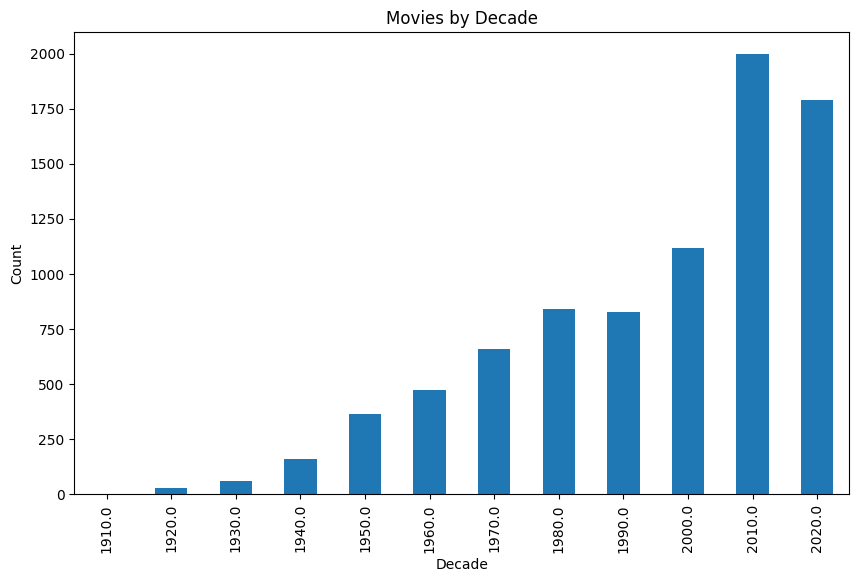

In [123]:
# Decade Distribution

movies['decade'] = (movies['year'] // 10) * 10
plt.figure(figsize=(10,6))
movies['decade'].value_counts().sort_index().plot(kind='bar')
plt.title('Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()

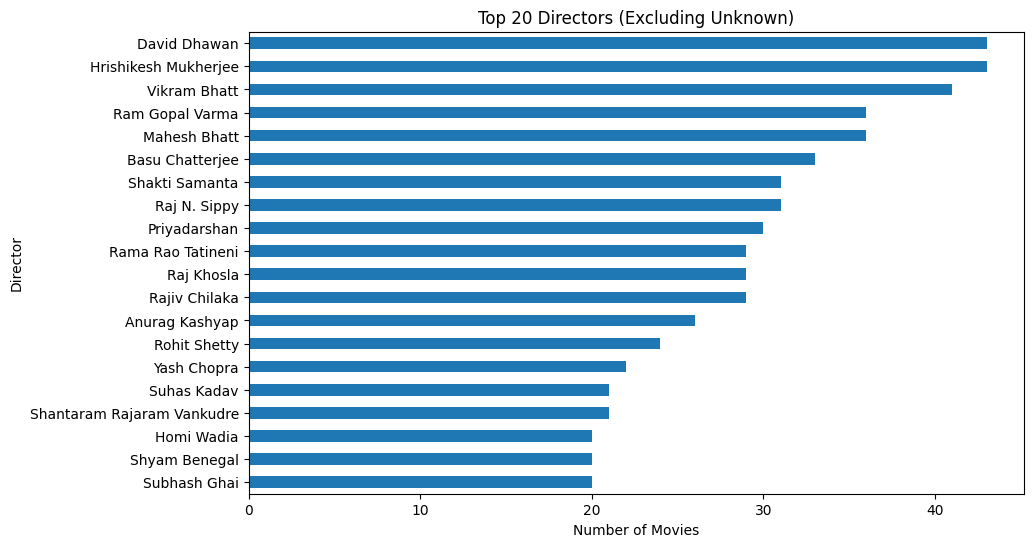

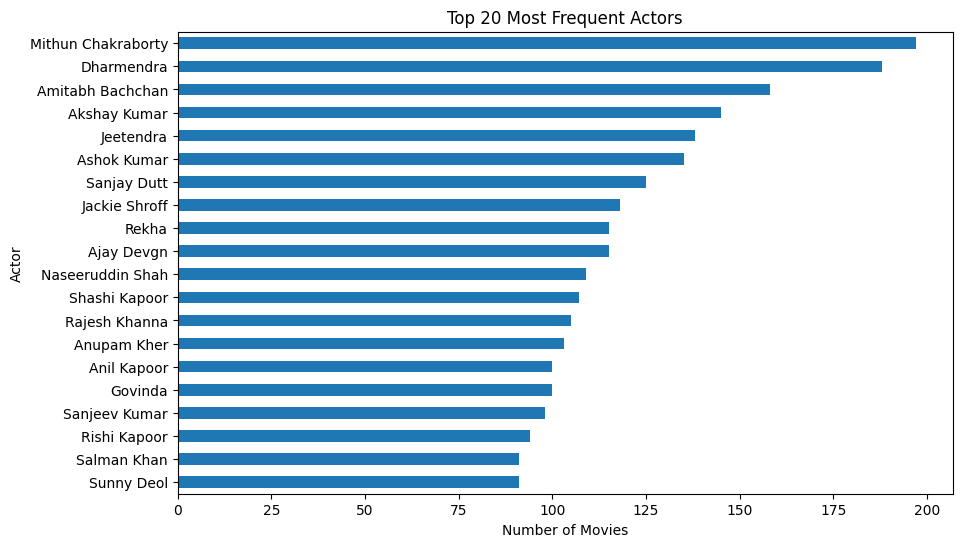

In [124]:
def plot_director_analysis(top_n=10):
    """
    Analyze and visualize the most frequent directors, excluding 'Unknown'
    """
    # Filter out 'Unknown' directors
    directors = movies[movies['director'] != 'Unknown']['director']

    if directors.empty:
        print("No director data available (all marked as Unknown)")
        return

    # Get top directors
    top_directors = directors.value_counts().head(top_n)

    # Plot
    plt.figure(figsize=(10,6))
    top_directors.plot(kind='barh')
    plt.title(f'Top {top_n} Directors (Excluding Unknown)')
    plt.xlabel('Number of Movies')
    plt.ylabel('Director')
    plt.gca().invert_yaxis()
    plt.show()
plot_director_analysis(20)

def plot_actor_analysis(top_n=10):
    """
    Analyze and visualize the most frequent actors, excluding empty strings
    """
    # Explode cast into individual actors, filter out empty strings
    all_actors = movies['cast'].str.split(', ').explode()
    all_actors = all_actors[all_actors != '']

    if all_actors.empty:
        print("No actor data available")
        return

    # Get top actors
    top_actors = all_actors.value_counts().head(top_n)

    # Plot
    plt.figure(figsize=(10,6))
    top_actors.plot(kind='barh')
    plt.title(f'Top {top_n} Most Frequent Actors')
    plt.xlabel('Number of Movies')
    plt.ylabel('Actor')
    plt.gca().invert_yaxis()
    plt.show()

plot_actor_analysis(20)

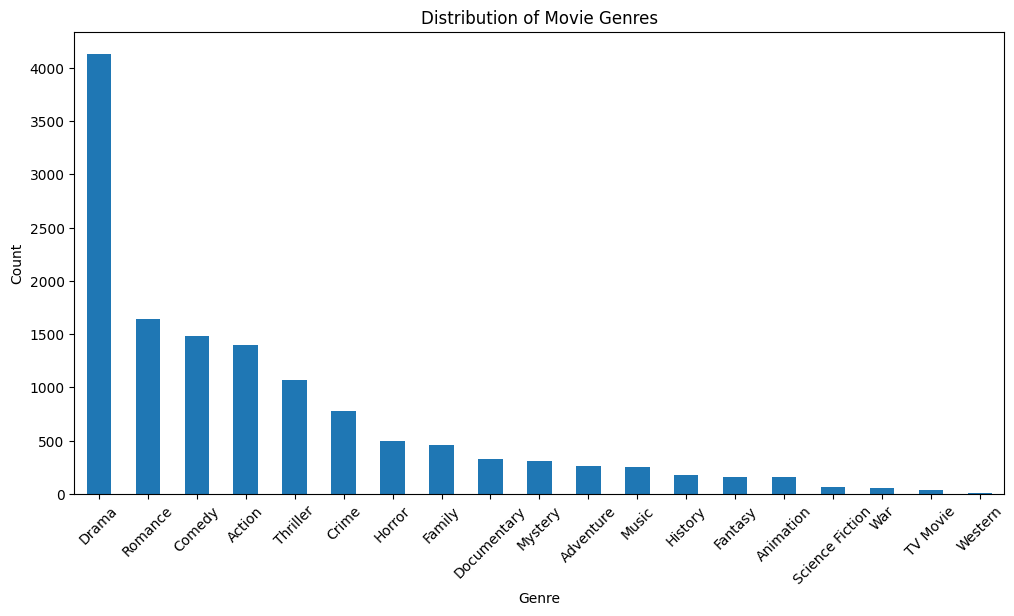

In [125]:
def plot_genre_distribution():
    # Explode genres into separate rows
    genres = movies['genres'].str.split(', ').explode()

    plt.figure(figsize=(12,6))
    genres.value_counts().plot(kind='bar')
    plt.title('Distribution of Movie Genres')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_genre_distribution()

In [126]:
# Data Cleaning

# Drop rows where title is missing
movies = movies.dropna(subset=['title'])

# Remove exact duplicate rows
movies = movies.drop_duplicates()

# Drop duplicates with same title and release_date
movies = movies.drop_duplicates(subset=['title', 'release_date'], keep='first')

# Fill missing genres and director with 'Unknown'
movies['genres'] = movies['genres'].fillna('Unknown')
movies['director'] = movies['director'].fillna('Unknown')

# Fill missing keywords and cast with empty strings
movies['keywords'] = movies['keywords'].fillna('')
movies['cast'] = movies['cast'].fillna('')

# Calculate mean excluding zeros
mean_vote = movies.loc[movies['vote_average'] > 0, 'vote_average'].mean()
mean_pop = movies.loc[movies['popularity'] > 0, 'popularity'].mean()

# Replace 0s and NaNs with the mean
movies['vote_average'] = movies['vote_average'].replace(0, np.nan)
movies['vote_average'] = movies['vote_average'].fillna(mean_vote)
movies['vote_average'] = movies['vote_average'].round(1)

movies['popularity'] = movies['popularity'].replace(0, np.nan)
movies['popularity'] = movies['popularity'].fillna(mean_pop)

# Fill release_date with a placeholder date
movies['release_date'] = movies['release_date'].fillna('1900-01-01')

# Convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Fill missing year with year from release_date
movies['year'] = movies['year'].fillna(movies['release_date'].dt.year)

# Still missing years? Fill with mode (most common year)
movies['year'] = movies['year'].fillna(movies['year'].mode()[0])
movies['year'] = movies['year'].astype(int)

# Final sanity check
movies.info()

movies.to_csv('cleaned_movies.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 8409 entries, 0 to 8930
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            8409 non-null   int64         
 1   title         8409 non-null   object        
 2   genres        8409 non-null   object        
 3   year          8409 non-null   int64         
 4   keywords      8409 non-null   object        
 5   cast          8409 non-null   object        
 6   director      8409 non-null   object        
 7   vote_average  8409 non-null   float64       
 8   release_date  8409 non-null   datetime64[ns]
 9   popularity    8409 non-null   float64       
 10  decade        7822 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 788.3+ KB


In [127]:
import re

def preprocess_field(text):
    """Clean and tokenize individual metadata fields."""
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9, ]', '', text)  # keep letters, numbers, spaces, commas
    tokens = [t.strip().replace(" ", "") for t in text.split(',') if t.strip()]
    return ' '.join(tokens)

# Cleaned metadata fields
genres_clean = movies['genres'].apply(preprocess_field)
keywords_clean = movies['keywords'].apply(preprocess_field)
cast_clean = movies['cast'].apply(preprocess_field)
director_clean = movies['director'].apply(preprocess_field)

# New dataframe for metadata
movie_metadata = pd.DataFrame({
    'id': movies['id'],
    'title': movies['title'],
    'combined_metadata': genres_clean + ' ' + keywords_clean + ' ' + cast_clean + ' ' + director_clean,
    'year': movies['year'],
    'genres': movies['genres']
})

# Preview
movie_metadata.sample(5)


,id,title,combined_metadata,year,genres
7143,1402045,Queen 2,unknown kanganaranaut vikasbahl,1900,Unknown
6909,409222,A Ship Aground,drama alaknandasamarth kumarshahani kumarshahani,1988,Drama
553,237305,Gori Tere Pyaar Mein,comedy romance kareenakapoorkhan imrankhan an...,2013,"Comedy, Romance"
2277,54510,Gunga Jumna,unknown dilipkumar nasirkhan vyjayanthimala n...,1961,Unknown
1302,165904,Special 26,crime drama thriller heist conartist theft aks...,2013,"Crime, Drama, Thriller"


In [128]:


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorize text
vectorizer = CountVectorizer(stop_words='english')
metadata_matrix = vectorizer.fit_transform(movie_metadata['combined_metadata'])

# Compute cosine similarity
cosine_sim = cosine_similarity(metadata_matrix, metadata_matrix)



# Reset index to avoid row mismatches
movie_metadata = movie_metadata.reset_index(drop=True)

# Title-to-index mapping
title_to_index = pd.Series(movie_metadata.index, index=movie_metadata['title'].str.lower())




In [129]:
# Reset index to avoid row mismatches
movie_metadata = movie_metadata.reset_index(drop=True)

# Title-to-index mapping
title_to_index = pd.Series(movie_metadata.index, index=movie_metadata['title'].str.lower())


In [130]:
!pip install rapidfuzz

In [131]:
from rapidfuzz import process, fuzz

def recommend_movies(movie_input, top_n=10):
    """
    Enhanced recommendation function with proper error handling
    """
    try:
        # Case 1: Input is a dictionary of features
        if isinstance(movie_input, dict):
            # Preprocess input features with proper null handling
            processed_input = {
                'genres': preprocess_field(movie_input.get('genres', '')),
                'keywords': preprocess_field(movie_input.get('keywords', '')),
                'cast': preprocess_field(movie_input.get('cast', '')),
                'director': preprocess_field(movie_input.get('director', ''))
            }

            # Combine into a single string
            input_metadata = ' '.join(processed_input.values())

            # Vectorize this input
            input_vector = vectorizer.transform([input_metadata])

            # Calculate similarity with all movies
            sim_scores = cosine_similarity(input_vector, metadata_matrix)

            # Get top matches
            sim_scores = sim_scores[0]
            top_indices = np.argsort(sim_scores)[-top_n:][::-1]

            return movies.iloc[top_indices][['id', 'title', 'year', 'genres', 'vote_average', 'popularity']]

        # Case 2: Input is text (try fuzzy matching)
        elif isinstance(movie_input, str):
            # Find closest matches
            matches = process.extract(movie_input.lower(),
                                    movie_metadata['title'].str.lower(),
                                    scorer=fuzz.token_set_ratio,
                                    limit=5)

            if not matches:
                return f"No matches found for '{movie_input}'"

            # Get best match above threshold
            best_match, score, idx = max(matches, key=lambda x: x[1])
            if score < 70:
                suggestions = ', '.join(m[0] for m in matches)
                return f"No close match found for '{movie_input}'. Did you mean: {suggestions}?"

            movie_id = movie_metadata.iloc[idx]['id']

        # Case 3: Input is movie ID
        else:
            movie_id = movie_input

        # Check if movie exists
        if movie_id not in movie_metadata['id'].values:
            return f"Movie ID {movie_id} not found in dataset."

        # Get recommendations based on ID
        idx = movie_metadata.index[movie_metadata['id'] == movie_id][0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:top_n+1]  # Skip the movie itself
        movie_indices = [i[0] for i in sim_scores]

        return movies.iloc[movie_indices][['id', 'title', 'year', 'genres', 'vote_average', 'popularity']]

    except Exception as e:
        return f"An error occurred: {str(e)}"


In [132]:
def plot_movie_metrics(recommendations):
    """
    Plot vote average vs popularity of recommended movies
    """
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=recommendations, x='vote_average', y='popularity',
                   size='year', hue='genres', sizes=(20, 200))
    plt.title('Recommended Movies: Ratings vs Popularity')
    plt.xlabel('Vote Average')
    plt.ylabel('Popularity')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [133]:
def plot_recommendation_similarity(recommendations, original_input):
    """
    Visualize similarity scores with proper error handling
    """
    try:
        # Skip visualization for dictionary inputs
        if not isinstance(original_input, str) or not original_input:
            return

        # Try to find the original movie index
        original_idx = title_to_index.get(original_input.lower(), -1)
        if original_idx == -1:
            return

        # Calculate similarity scores
        sim_scores = [cosine_sim[original_idx][i] for i in recommendations.index]

        # Plot
        plt.figure(figsize=(10,6))
        sns.barplot(x=sim_scores, y=recommendations['title'])
        plt.title(f'Similarity Scores for Recommendations based on {original_input}')
        plt.xlabel('Similarity Score')
        plt.ylabel('Movie Title')
        plt.show()
    except Exception as e:
        print(f"Could not generate similarity plot: {str(e)}")

def enhanced_recommend(input_data, top_n=10):
    """
    Robust recommendation function with visualization
    """
    try:
        # Get recommendations
        recs = recommend_movies(input_data, top_n)

        if isinstance(recs, str):  # Error message
            print(recs)
            return None

        # Show input criteria
        if isinstance(input_data, dict):
            print("Recommendations based on:")
            for k, v in input_data.items():
                print(f"- {k}: {v}")
        else:
            # Get original movie title
            if isinstance(input_data, str):
                orig_title = input_data
            else:
                orig_title = movies[movies['id'] == input_data]['title'].values[0]
            print(f"Recommendations similar to: {orig_title}")

        # Show visualizations if we have recommendations
        if len(recs) > 1:
            plot_movie_metrics(recs)
            plot_recommendation_similarity(recs, input_data if isinstance(input_data, str) else "")

        return recs

    except Exception as e:
        print(f"An error occurred in enhanced_recommend: {str(e)}")
        return None

Recommendations based on:
- genres: Action, Adventure
- keywords: superhero, revenge
- cast: Chris Evans, Scarlett Johansson
- director: Joe Russo


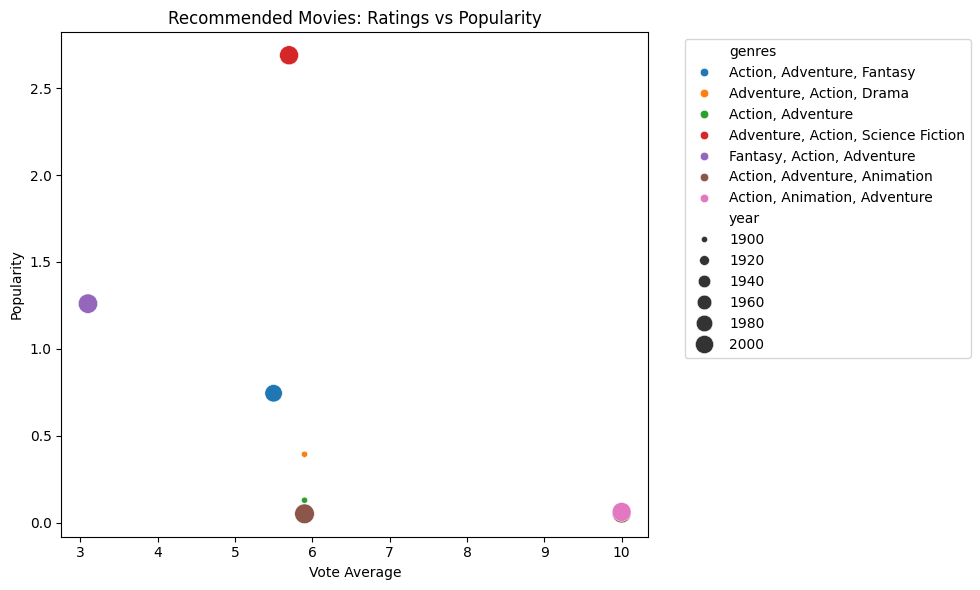

,id,title,year,genres,vote_average,popularity
1603,146255,Ajooba,1991,"Action, Adventure, Fantasy",5.5,0.7443
4468,937844,Shaktimaan,1900,"Adventure, Action, Drama",5.9,0.3930
6904,1148001,Sharaabi,1900,"Action, Adventure",5.9,0.1285
151,41517,Ra.One,2011,"Adventure, Action, Science Fiction",5.7,2.6901
1058,396643,A Flying Jatt,2016,"Fantasy, Action, Adventure",3.1,1.2600
7775,371145,Little Krishna - The Wondrous Feats,2008,"Action, Adventure, Animation",10.0,0.0520
7799,1055640,Chhota Bheem Aur Kaalsura Ka Jaadui Jaal,2019,"Action, Adventure, Animation",5.9,0.0505
7666,371140,Little Krishna - The Legendary Warrior,2009,"Action, Animation, Adventure",10.0,0.0616


Recommendations similar to: avngers


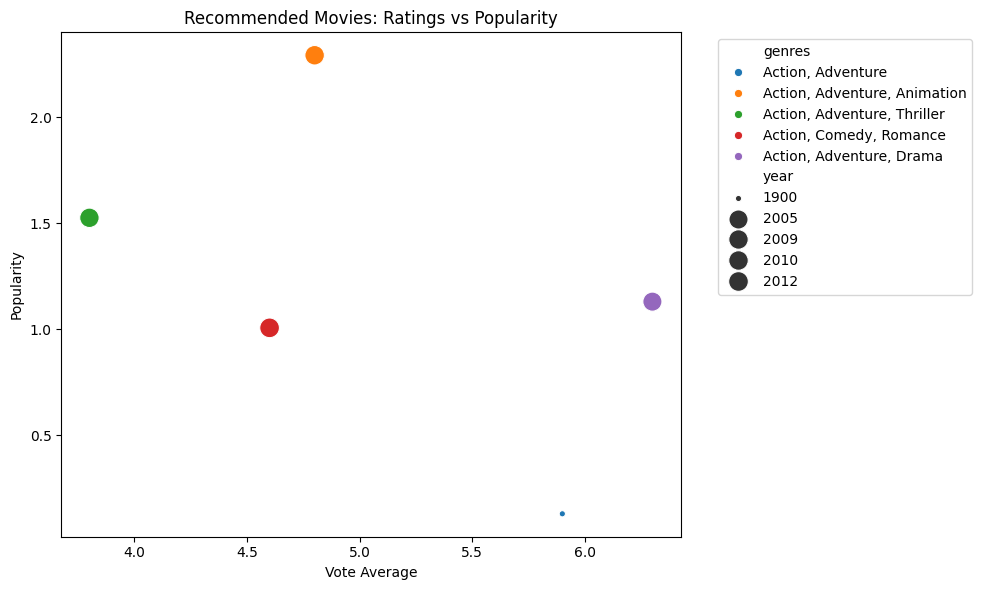

,id,title,year,genres,vote_average,popularity
6904,1148001,Sharaabi,1900,"Action, Adventure",5.9,0.1285
221,58046,Toonpur Ka Superrhero,2010,"Action, Adventure, Animation",4.8,2.2934
464,24595,Blue,2009,"Action, Adventure, Thriller",3.8,1.5260
990,140896,Son of Sardaar,2012,"Action, Comedy, Romance",4.6,1.0065
1060,301687,Tango Charlie,2005,"Action, Adventure, Drama",6.3,1.1302


Recommendations based on:
- genres: Comedy
- cast: Akshay Kumar


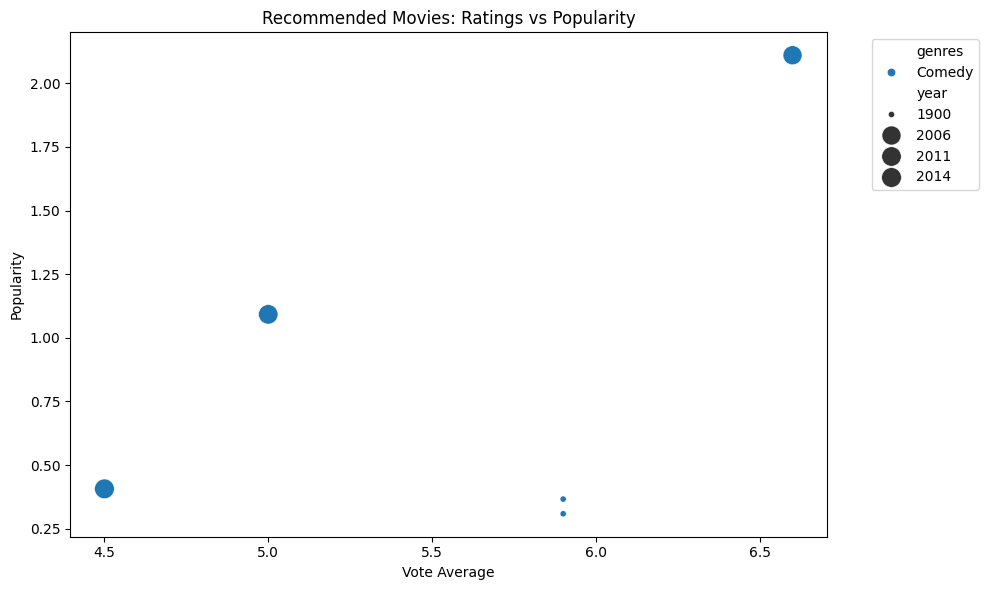

,id,title,year,genres,vote_average,popularity
3154,1384270,Bhagam Bhag 2,1900,Comedy,5.9,0.3663
251,20359,Phir Hera Pheri,2006,Comedy,6.6,2.1104
3970,1169516,Welcome to the Jungle,1900,Comedy,5.9,0.3085
3133,297019,The Shaukeens,2014,Comedy,4.5,0.4066
867,61400,Thank You,2011,Comedy,5.0,1.0922


No close match found for ''. Did you mean: sikandar, jewel thief - the heist begins, deva, sky force, dhoom dhaam?


In [134]:
# 1. Recommend by dictionary (robust to missing fields)
test_movie = {
    "genres": "Action, Adventure",
    "keywords": "superhero, revenge",
    "cast": "Chris Evans, Scarlett Johansson",
    "director": "Joe Russo"
}
recommendations = enhanced_recommend(test_movie, top_n=8)
if recommendations is not None:
    display(recommendations)

# 2. Recommend by title with fuzzy matching (handles typos)
recommendations = enhanced_recommend("avngers", top_n=5)  # Intentional typo
if recommendations is not None:
    display(recommendations)

# 3. Recommend with partial dictionary
partial_input = {
    "genres": "Comedy",
    "cast": "Akshay Kumar"
}
recommendations = enhanced_recommend(partial_input, top_n=5)
if recommendations is not None:
    display(recommendations)

# 4. Edge case - empty input
recommendations = enhanced_recommend("", top_n=5)